In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [4]:
cap = cv2.VideoCapture(1)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    start_time = time.time()
    end_time = start_time + 10
    
    while cap.isOpened() and time.time()<end_time:
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
draw_landmarks(frame, results)

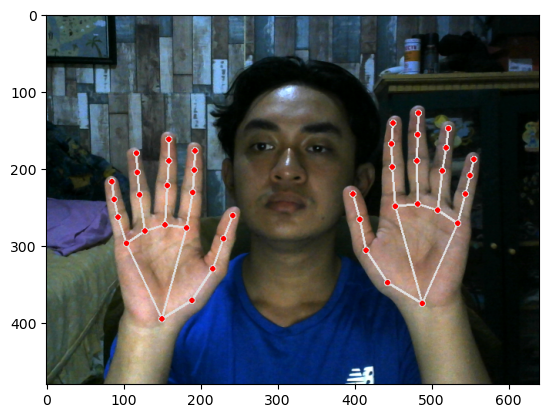

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [8]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [9]:
result_test = extract_keypoints(results)

In [10]:
np.save('0', result_test)
np.load('0.npy')

array([ 7.62698233e-01,  7.82653987e-01,  3.91446065e-07,  6.92768931e-01,
        7.26974130e-01, -2.60455888e-02,  6.49814248e-01,  6.37523592e-01,
       -3.82351428e-02,  6.36488080e-01,  5.55526078e-01, -4.92504537e-02,
        6.22125089e-01,  4.86321419e-01, -5.92578091e-02,  7.08747625e-01,
        5.19636214e-01, -1.63356513e-02,  7.02197611e-01,  4.13261473e-01,
       -3.81984077e-02,  7.00719833e-01,  3.50002736e-01, -5.66867590e-02,
        7.03679681e-01,  2.95228302e-01, -7.01406747e-02,  7.53660738e-01,
        5.14013350e-01, -2.10160036e-02,  7.53043175e-01,  3.97595108e-01,
       -3.83105688e-02,  7.53656685e-01,  3.25761944e-01, -5.40827289e-02,
        7.54862249e-01,  2.67676145e-01, -6.60355985e-02,  7.95248091e-01,
        5.30147254e-01, -3.05712596e-02,  8.04070592e-01,  4.23829705e-01,
       -4.87899035e-02,  8.11407804e-01,  3.61189544e-01, -5.86390868e-02,
        8.16593885e-01,  3.08999777e-01, -6.60323873e-02,  8.34860027e-01,
        5.65225661e-01, -

In [21]:
actions = np.array(['apa']) #
no_sequences = 30

sequence_length = 30

start_folder = 30

DATA_PATH = (r"C:\Users\victus\Documents\SignLanguage\MotionDetectionforSIBIv2\DatasetV2") 

In [22]:
for action in actions: 
    path = os.path.join(DATA_PATH, action)
    if not os.path.exists(path):
        os.makedirs(path)
    dirlist = os.listdir(path)
    if len(dirlist) == 0:
        dirmax = 0
    else:
        dirmax = np.max(np.array(dirlist).astype(int))

In [23]:
import os

directory_path = r"C:\Users\victus\Documents\SignLanguage\MotionDetectionforSIBIv2\DatasetV2"

doc = []

for root, dirs, files in os.walk(directory_path):
    doc.extend(dirs)
    break 
print(doc)
len(doc)

['aku', 'apa', 'bagaimana', 'berapa', 'di', 'F', 'halo', 'I', 'J', 'K', 'kamu', 'kapan', 'ke', 'mana', 'mereka', 'nama', 'saya', 'siapa', 'Y', 'yang']


20

In [24]:
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(1, no_sequences+1):
            subdir = dirmax + sequence
            subdir_path = os.path.join(DATA_PATH, action, str(subdir))
            os.makedirs(subdir_path, exist_ok=True)
            
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
   
                    cv2.imshow('OpenCV Feed', image)
            
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(subdir_path, '{}_keypoints_{}.npy'.format(action, frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()